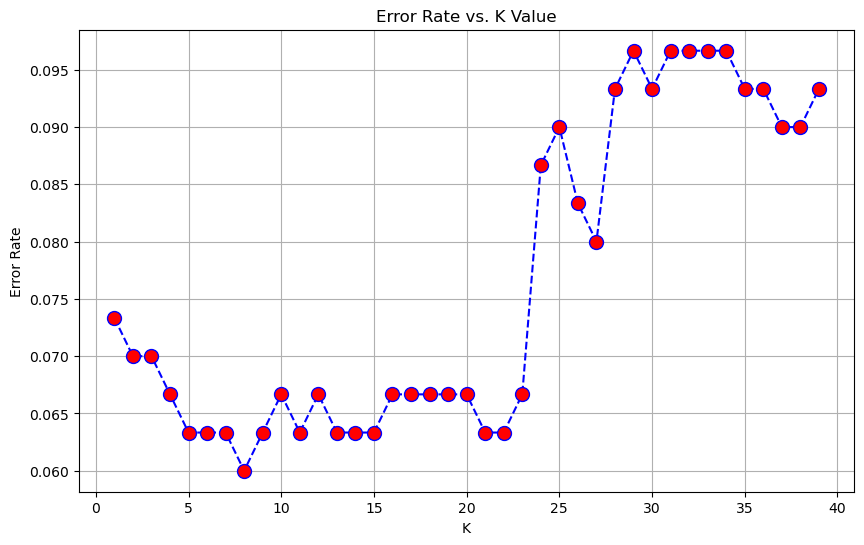

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# --- Step 1: Generate Fake Data (1000 points) ---
# We need enough data to test big K values
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Step 2: The Loop (Testing K=1 to K=40) ---
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Record the average error (Where prediction != actual)
    error_rate.append(np.mean(pred_i != y_test))

# --- Step 3: Visualize the "Elbow" ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()